<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f

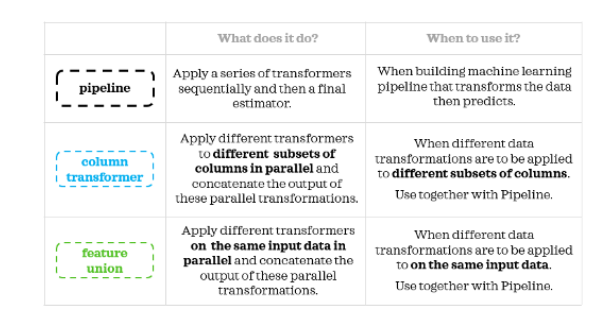

In [ ]:
# Set seed for reproducibility
seed = 123

# Import package/module for data
import pandas as pd
from seaborn import load_dataset
import numpy as np

# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Load dataset
df = load_dataset('tips').drop(columns=['tip', 'sex']).sample(n=5, random_state=seed)

# Add missing values
df.iloc[[1, 2, 4], [2, 4]] = np.nan
df

,total_bill,smoker,day,time,size
112,38.07,No,Sun,Dinner,3.0
19,20.65,No,NaN,Dinner,NaN
187,30.46,Yes,NaN,Dinner,NaN
169,10.63,Yes,Sat,Dinner,2.0
31,18.35,No,NaN,Dinner,NaN


In [ ]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['total_bill']), 
                                                    df['total_bill'], 
                                                    test_size=.2, 
                                                    random_state=seed)

# Define categorical columns
categorical = list(X_train.select_dtypes('category').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")


# Define categorical pipeline
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', MinMaxScaler())])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categorical),
                                               ('num', num_pipe, numerical)])

# Fit a pipeline with transformers and an estimator to the training data
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', LinearRegression())])
pipe.fit(X_train, y_train)

# Predict training data
y_train_pred = pipe.predict(X_train)
print(f"Predictions on training data: {y_train_pred}")

# Predict test data
y_test_pred = pipe.predict(X_test)
print(f"Predictions on test data: {y_test_pred}")

Categorical columns are: ['smoker', 'day', 'time']
Numerical columns are: ['size']
Predictions on training data: [10.63 18.35 38.07 30.46]
Predictions on test data: [18.35]


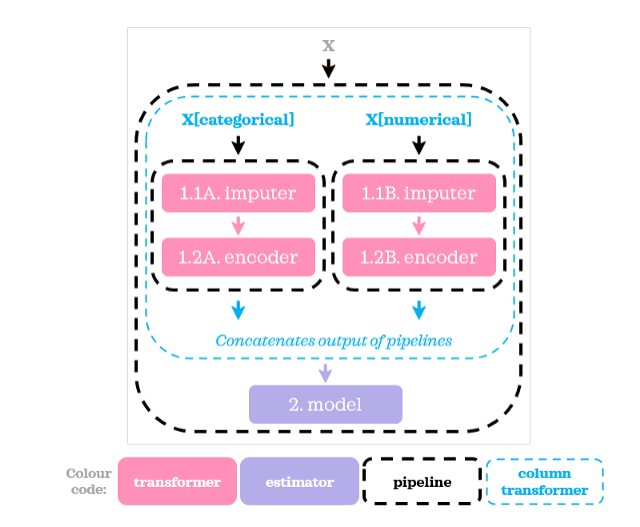

In [ ]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['total_bill']), 
                                                    df['total_bill'], 
                                                    test_size=.2, 
                                                    random_state=seed)

# Define categorical columns
categorical = list(X_train.select_dtypes('category').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]


cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical)),
                     ('imputer', SimpleImputer(strategy='median')),
                     ('scaler', MinMaxScaler())])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Combine categorical and numerical pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', LinearRegression())])
pipe.fit(X_train, y_train)

# Predict training data
y_train_pred = pipe.predict(X_train)
print(f"Predictions on training data: {y_train_pred}")

# Predict test data
y_test_pred = pipe.predict(X_test)
print(f"Predictions on test data: {y_test_pred}")

Categorical columns are: ['smoker', 'day', 'time']
Numerical columns are: ['size']
Predictions on training data: [10.63 18.35 38.07 30.46]
Predictions on test data: [18.35]


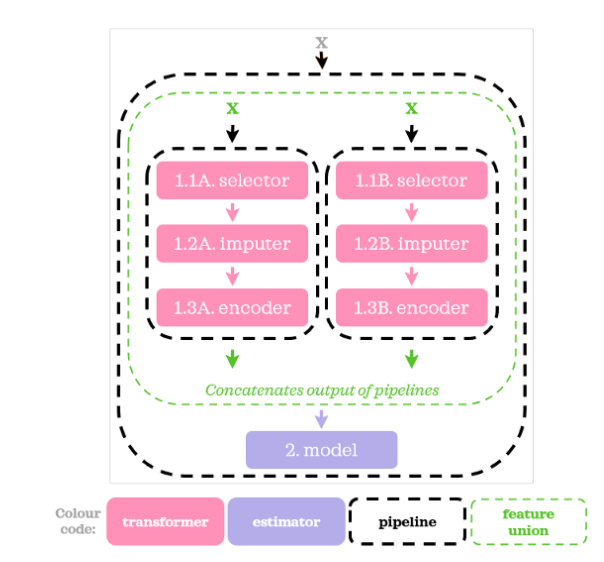